# Probability Exercise

## Probability Exercise: How to increase our good trade from 50% to 70%?

Goals of this chapter:

- Compute and understand Random Variable
- Compute and understand Intersection, Union and Independency
- Compute and understand Conditional Probability

In [2]:
import yfinance as yf
import ta # library to create technical indicators
import numpy as np
# scipy==1.7.1 in video
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the data and create variations of google
df = yf.download("GOOG")[["Adj Close"]].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019
...,...
2024-09-10,0.003143
2024-09-11,0.014266
2024-09-12,0.022281


### Compute Basic Propability

In [4]:
# we have a random variable that is the google return and we want to unerstand the rules that this random variable follows
# only two cases: the return will be positive or the return will be negative
# compute the chance of an increase
# we'll extract all the positive returns, compute the number of positive returns and devide by the number of returns
# (1) extracting all the positive returns
positive_returns = len(df[df["Adj Close"]>0]) # 2659 out of 5051 are positive
positive_returns

2660

In [5]:
# calculating the percentage of increase
p_increase = positive_returns / len(df) * 100
p_increase

52.65241488519399

In [6]:
# compute the chance of a decrease
p_decrease = len(df[df["Adj Close"]<0]) / len(df) * 100
p_decrease

47.327790973871736

In [7]:
# %Increase + %Decrease close to one but not mandatory 1
print(f"Weights | \t Increase: {"%2.f" % p_increase} \t Decrease: {"%2.f" % p_decrease}")
# output: Weights | 	 Increase: 53 	 Decrease: 47
# we have more changes of having an increase than a decrease
# small difference, not good to use as basis for a trading strategy

Weights | 	 Increase: 53 	 Decrease: 47


### Computing Conditional Probability - Creating Bollinger Bands

Goal of this excercise: computing the probability of increase knowing that a technical indicator tells us to buy this stock.

In [8]:
# bollinger band class
from ta.volatility import BollingerBands

**Bollinger Bands** are used as an example here but you have to use a stronger strategy if you want to invest on it.

- Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price. Because the distance of the bands is based on standard deviation, they adjust to volatility swings in the underlying price. Bollinger Bands use 2 parameters, Period and Standard Deviations, StdDev ([fidelity.com](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands)).

In [9]:
# Import close price
df = yf.download("EURUSD=X")[["Adj Close"]]
# create the returns
df["return"] = df["Adj Close"].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,return
Date,,
2003-12-01,1.196501,NaN
2003-12-02,1.208897,0.010360
2003-12-03,1.212298,0.002813
2003-12-04,1.208094,-0.003467
2003-12-05,1.218695,0.008775
...,...,...
2024-09-11,1.102098,-0.001499
2024-09-12,1.101091,-0.000914
2024-09-13,1.107788,0.006082


In [10]:
# initialize Bollinger Bands class
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)
indicator_bb

In [12]:
# add Bollinger Bands features
# lower band
df["bb_bbl"] = indicator_bb.bollinger_lband()
# upper band
df["bb_bbh"] = indicator_bb.bollinger_hband()

In [15]:
df

,Adj Close,return,bb_bbl,bb_bbh
Date,,,,
2003-12-01,1.196501,NaN,NaN,NaN
2003-12-02,1.208897,0.010360,NaN,NaN
2003-12-03,1.212298,0.002813,NaN,NaN
2003-12-04,1.208094,-0.003467,NaN,NaN
2003-12-05,1.218695,0.008775,NaN,NaN
...,...,...,...,...
2024-09-11,1.102098,-0.001499,1.100004,1.117319
2024-09-12,1.101091,-0.000914,1.099970,1.117330
2024-09-13,1.107788,0.006082,1.101414,1.116937


<Axes: xlabel='Date'>

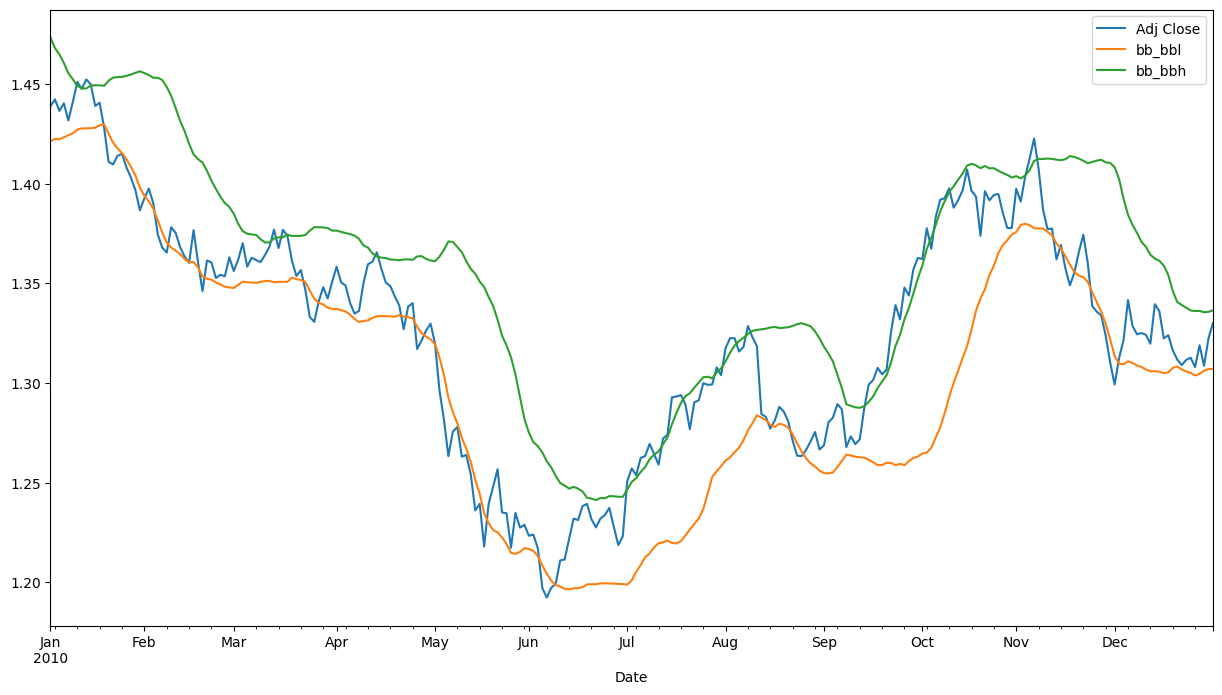

In [18]:
# plotting the data from one year using pandas
df[["Adj Close", "bb_bbl", "bb_bbh"]].loc["2010"].plot(figsize=(15,8))

### Computing Conditional Probability for Bollinger Bands Strategy

In [19]:
# Import close price
df = yf.download("ETH-USD")[["Adj Close"]]
# create the returns
df["return"] = df["Adj Close"].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,return
Date,,
2017-11-09,320.884003,NaN
2017-11-10,299.252991,-0.067411
2017-11-11,314.681000,0.051555
2017-11-12,307.907990,-0.021523
2017-11-13,316.716003,0.028606
...,...,...
2024-09-13,2441.607178,0.033799
2024-09-14,2418.595703,-0.009425
2024-09-15,2320.897217,-0.040395


In [20]:
# initialize Bollinger Bands class
indicator_bb = BollingerBands(close=df["Adj Close"], window=20, window_dev=1.5)
indicator_bb

In [25]:
# add Bollinger Bands features
# moving average
df["bb_bbm"] = indicator_bb.bollinger_mavg()
# lower band
df["bb_bbl"] = indicator_bb.bollinger_lband()
# upper band
df["bb_bbh"] = indicator_bb.bollinger_hband()
df

,Adj Close,return,bb_bbl,bb_bbh,bb_bbm
Date,,,,,
2017-11-09,320.884003,NaN,NaN,NaN,NaN
2017-11-10,299.252991,-0.067411,NaN,NaN,NaN
2017-11-11,314.681000,0.051555,NaN,NaN,NaN
2017-11-12,307.907990,-0.021523,NaN,NaN,NaN
2017-11-13,316.716003,0.028606,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-13,2441.607178,0.033799,2254.715157,2632.847563,2443.781360
2024-09-14,2418.595703,-0.009425,2270.054076,2584.452442,2427.253259
2024-09-15,2320.897217,-0.040395,2275.103162,2543.359020,2409.231091


In [28]:
# the strategy will be to understand the behavior of the adjusted close price 
# knowing that yesterday the price was below the upper bollinger band and today is above
# goal: finding out when to sell
# to achieve this we need to shift some values by
# (1) creating two new columns: yesterday adjusted close and yesterday bollinger band (upper)
df["Adj Close Yesterday"] = df["Adj Close"].shift(1)
df["bbh_yesterday"] = df["bb_bbh"].shift(1)
#drop the rows containing missing values
df.dropna()
df

,Adj Close,return,bb_bbl,bb_bbh,bb_bbm,Adj Close Yesterday,bbh_yesterday
Date,,,,,,,
2017-11-09,320.884003,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,299.252991,-0.067411,NaN,NaN,NaN,320.884003,NaN
2017-11-11,314.681000,0.051555,NaN,NaN,NaN,299.252991,NaN
2017-11-12,307.907990,-0.021523,NaN,NaN,NaN,314.681000,NaN
2017-11-13,316.716003,0.028606,NaN,NaN,NaN,307.907990,NaN
...,...,...,...,...,...,...,...
2024-09-13,2441.607178,0.033799,2254.715157,2632.847563,2443.781360,2361.781738,2677.123185
2024-09-14,2418.595703,-0.009425,2270.054076,2584.452442,2427.253259,2441.607178,2632.847563
2024-09-15,2320.897217,-0.040395,2275.103162,2543.359020,2409.231091,2418.595703,2584.452442


In [29]:
# variable initialization
# n -> we need to compute the number of days from the signal to the day 1, signal to day 2, etc. (so far: ???)
n = 0
# everytime we have a signal we put the date in the list of days
dates = []
# list to keep the return of the n day after the signal
returns = []